In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
estados = pd.read_csv('brasil_estados.csv')
estados

In [ ]:
area_proporcional = estados[['regiao_nome', 'uf', 'area']].merge(
    estados.groupby('regiao_nome')['area'].sum().reset_index(),
    on = 'regiao_nome',
    how = 'left'
)
area_proporcional

In [ ]:
area_rank = estados.groupby(['uf'])['area'].sum().rank().reset_index().sort_values(by='area', ascending=False)
area_rank

In [ ]:
area_rank = estados.groupby(['regiao_nome', 'uf'])['area'].sum().reset_index()
area_rank['rank_area_regiao'] = area_rank.groupby(['regiao_nome'])['area'].rank(method='first')
area_rank

In [ ]:
media = estados['area'].mean()
estados['classe_area'] = estados['area'].apply(lambda x: 'Acima' if x > media else 'Abaixo')
estados

In [ ]:
estados.pivot_table(index='regiao_nome', columns='classe_area', values='area', aggfunc=['sum', 'mean', 'count'], fill_value=0).reset_index()

In [19]:
soma = estados['area'].sum()
maiores_estados = estados[['uf', 'area']].sort_values(by='area', ascending=False)
maiores_estados['percentual'] = round(maiores_estados['area'] / soma * 100, 2)
maiores_estados['acumulado'] = maiores_estados['percentual'].cumsum()
maiores_estados['curva_abc'] = maiores_estados['acumulado'].apply(lambda x : 'A' if x <= 65 else ('B' if x <= 90 else 'C'))
maiores_estados['legenda'] = maiores_estados.apply(lambda x : x['uf'] if x['curva_abc'] != 'C' else 'Outros', axis=1)
maiores_estados

/tmp/ipykernel_1183/1187566329.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maiores_estados.groupby(['legenda']).sum().reset_index()


,legenda,area,percentual,acumulado
0,Amazonas,1559167.889,18.32,18.32
1,Bahia,564760.427,6.64,57.10
2,Goiás,340203.329,4.00,65.30
3,Maranhão,329642.182,3.87,69.17
4,Mato Grosso,903207.019,10.61,43.57
5,Mato Grosso do Sul,357145.534,4.20,61.30
6,Minas Gerais,586521.123,6.89,50.46
7,Outros,903918.952,10.61,1165.64
8,Paraná,199298.979,2.34,89.38
9,Pará,1245870.798,14.64,32.96


In [23]:
maiores_areas = estados[['uf', 'area']].sort_values(by='area', ascending=False)
maiores_areas['anterior'] = maiores_estados['area'].shift(1)
maiores_areas['diferenca'] = maiores_estados['area'].shift(1) - maiores_estados['area']
maiores_areas['percentual'] = maiores_areas['area'].pct_change(periods=1)
maiores_areas

,uf,area,anterior,diferenca,percentual
3,Amazonas,1559167.889,NaN,NaN,NaN
13,Pará,1245870.798,1559167.889,313297.091,-0.200939
10,Mato Grosso,903207.019,1245870.798,342663.779,-0.275040
12,Minas Gerais,586521.123,903207.019,316685.896,-0.350624
4,Bahia,564760.427,586521.123,21760.696,-0.037101
11,Mato Grosso do Sul,357145.534,564760.427,207614.893,-0.367616
8,Goiás,340203.329,357145.534,16942.205,-0.047438
9,Maranhão,329642.182,340203.329,10561.147,-0.031044
20,Rio Grande do Sul,281707.156,329642.182,47935.026,-0.145415
26,Tocantins,277466.763,281707.156,4240.393,-0.015052


In [28]:
estados[['area', 'populacao', 'matricula', 'idh', 'receitas', 'despesas', 'rendimento', 'veiculos']].corr()

,area,populacao,matricula,idh,receitas,despesas,rendimento,veiculos
area,1.000000,0.045726,0.103052,-0.210447,0.009131,0.012493,-0.242461,-0.022114
populacao,0.045726,1.000000,0.994712,0.368471,0.983539,0.981515,0.365265,0.967715
matricula,0.103052,0.994712,1.000000,0.304599,0.963954,0.962989,0.307704,0.944988
idh,-0.210447,0.368471,0.304599,1.000000,0.478499,0.454881,0.947880,0.483255
receitas,0.009131,0.983539,0.963954,0.478499,1.000000,0.997481,0.468843,0.991868
despesas,0.012493,0.981515,0.962989,0.454881,0.997481,1.000000,0.448210,0.991337
rendimento,-0.242461,0.365265,0.307704,0.947880,0.468843,0.448210,1.000000,0.460790
veiculos,-0.022114,0.967715,0.944988,0.483255,0.991868,0.991337,0.460790,1.000000


<Axes: xlabel='area', ylabel='populacao'>

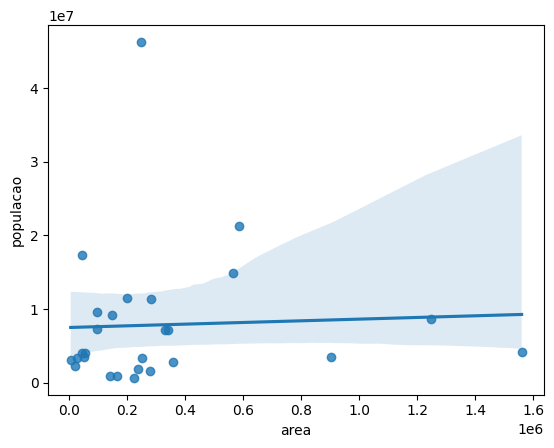

In [33]:
sns.regplot(data=estados, x='area', y='populacao')

<Axes: xlabel='area', ylabel='idh'>

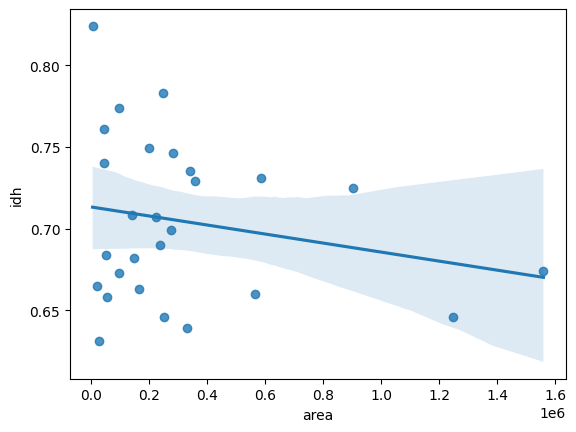

In [34]:
sns.regplot(data=estados, x='area', y='idh')

<Axes: xlabel='idh', ylabel='receitas'>

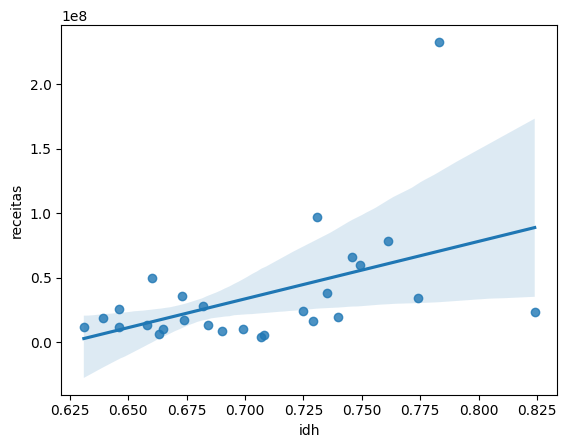

In [35]:
sns.regplot(data=estados, x='idh', y='receitas')